In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [21]:
data=pd.read_csv("titanic.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
data.shape

(891, 15)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


<Axes: xlabel='survived', ylabel='count'>

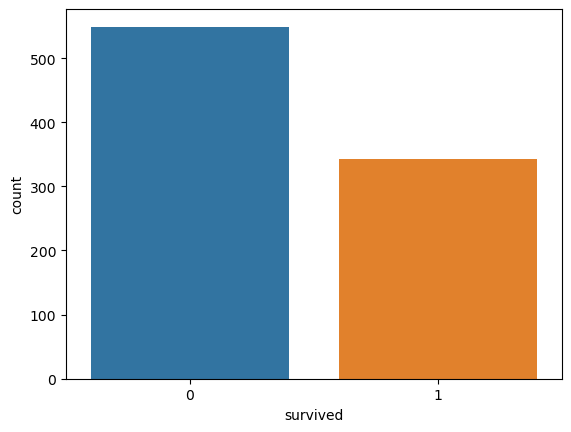

In [24]:
sns.countplot(x="survived",data=data)


<Axes: xlabel='survived', ylabel='count'>

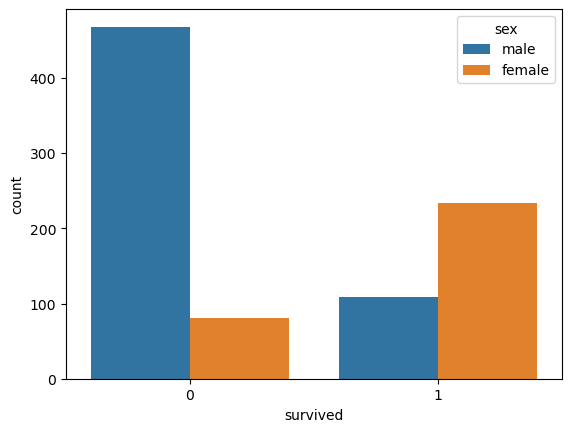

In [25]:
sns.countplot(x="survived",data=data,hue="sex")


<Axes: xlabel='survived', ylabel='count'>

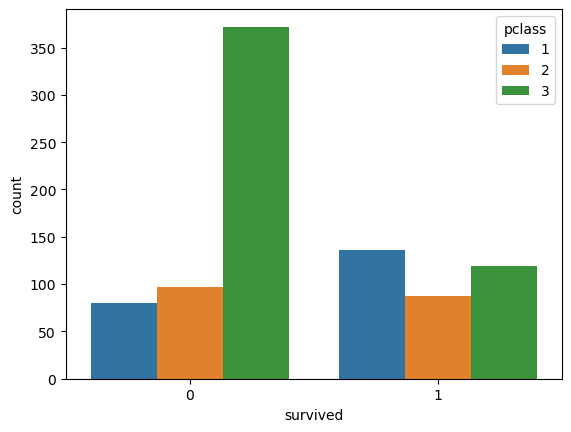

In [26]:
sns.countplot(x="survived",data=data,hue="pclass")


<Axes: ylabel='Frequency'>

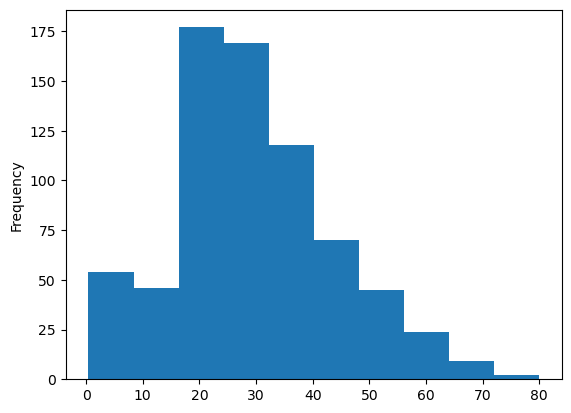

In [27]:
data["age"].plot.hist()

<Axes: ylabel='Frequency'>

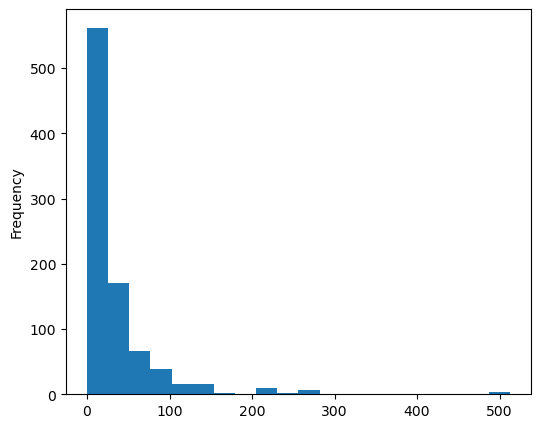

In [28]:
data["fare"].plot.hist(bins=20,figsize=(6,5))

<Axes: xlabel='sibsp', ylabel='count'>

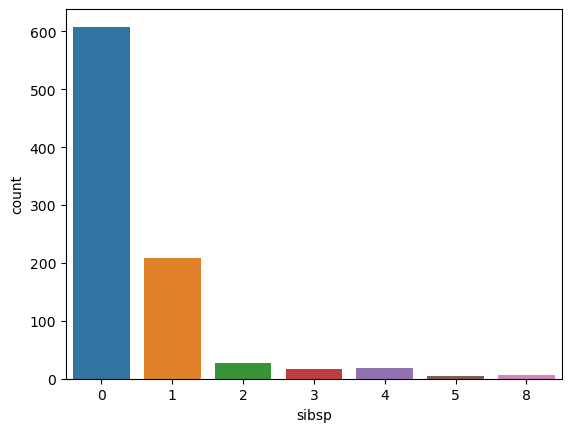

In [29]:
sns.countplot(data=data,x="sibsp")

<Axes: xlabel='pclass', ylabel='age'>

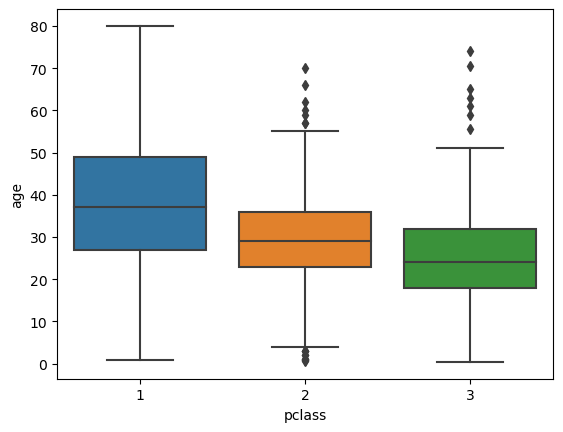

In [30]:
sns.boxplot(data=data,x="pclass",y="age")

In [31]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

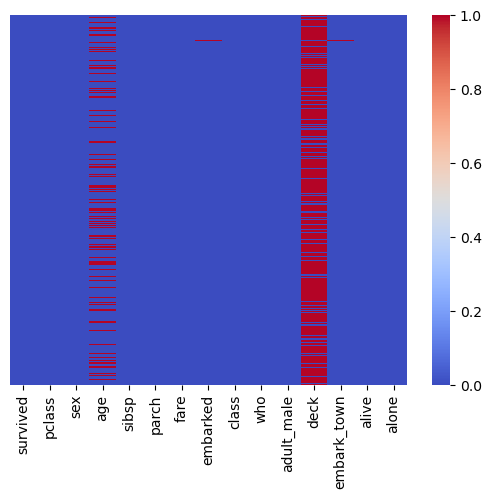

In [32]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="coolwarm")

In [33]:
data.drop("deck",axis=1,inplace=True)

In [34]:
data.dropna(inplace=True)

<Axes: >

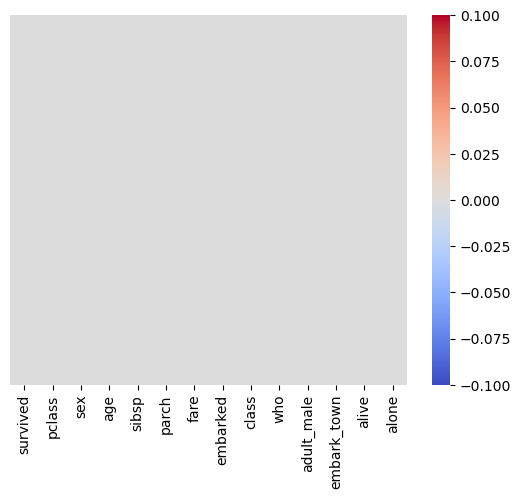

In [35]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="coolwarm")

In [36]:
data.drop(["alive","alone","embark_town","adult_male","who","embarked","embark_town"],axis=1,inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   class     712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [38]:
data.drop("class",axis=1,inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.5+ KB


In [40]:
pd.get_dummies(data["sex"])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [41]:
sex=pd.get_dummies(data["sex"],drop_first=True)

In [42]:
data.drop("sex",axis=1,inplace=True)

In [43]:
data=pd.concat([data,sex],axis=1)


In [44]:
data.head()

,survived,pclass,age,sibsp,parch,fare,male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   male      712 non-null    bool   
dtypes: bool(1), float64(2), int64(4)
memory usage: 39.6 KB


## Training and Testing data

In [48]:
x=data.drop("survived",axis=1)
y=data["survived"]

In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [50]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)

y_predicted=model.predict(x_test)

### Model Evaluation

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

accuracy=accuracy_score(y_test,y_predicted)
print("Accuracy:",accuracy)

confusion_mat=confusion_matrix(y_test,y_predicted)
print("Confusion Matrix")
print(confusion_mat)
# confusion matrix
classification_rep=classification_report(y_test,y_predicted)
print("classification_report:")
print(classification_rep)

Accuracy: 0.7552447552447552
Confusion Matrix
[[66 19]
 [16 42]]
classification_report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        85
           1       0.69      0.72      0.71        58

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



### ROC Curve

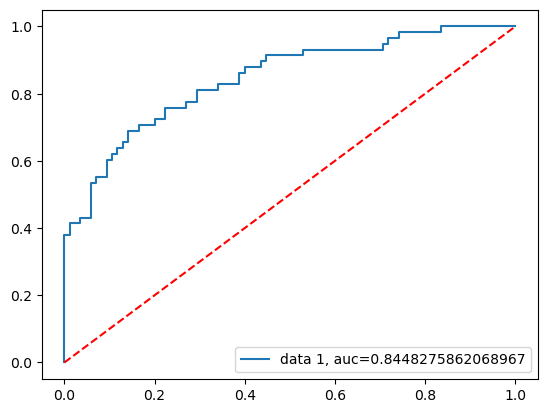

In [55]:
from sklearn import metrics

y_pred_proba=model.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r--')

plt.legend(loc=4)
plt.show()

### Log Loss

In [58]:
from sklearn.metrics import log_loss

y_p=model.predict_proba(x_test)

loglos=log_loss(y_test,y_p)

print("Logloss: %2f" %(loglos))

Logloss: 0.476875
